<a href="https://colab.research.google.com/github/safrints/house-price-prediction-ml/blob/main/house_price_prediction_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**HOUSE PRICE PREDICTION**

---







# INRODUCTION


* The real estate market is one of
the most dynamic sectors, influenced by a variety of factors such as location, economic conditions, population growth, and property features

* Predicting house prices accurately is essential for buyers, sellers, and investors to make informed financial decisions

* Traditional methord of pricing do not give precise information which can lead to incondidtence

* House price prediction uses machine learning techniques to analyze historical housing data and identify key patterns that influence property value.

* Through Exploratory Data Analysis (EDA), the relationships between key attributes and property prices are explored to gain deeper insights.

* Predictive models can then be built using algorithms such as Linear Regression, Decision Tree, Random Forest, or Support Vector Regression (SVR).

* Model performance is evaluated using statistical measures like Mean Squared Error (MSE) and R² score to determine accuracy.

* This project highlights how machine learning can deliver dependable, unbiased, and data-informed predictions that support decision-making in the real estate industry.

# **DATA LOADING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/internship/Housing.csv")

# **DATA PROCESSING**

* Handle missing values
* Remove duplicates
* Encode categorical data
* Scale numerical data





**to find informations of dataset**






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**to find duplicates values**

**data.duplicated()**

In [ ]:
data.duplicated().sum()

np.int64(0)

###Encode Categorial Value

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
data['mainroad'] = Le.fit_transform(data['mainroad'])
data['guestroom'] = Le.fit_transform(data['guestroom'])
data['basement'] = Le.fit_transform(data['basement'])
data['hotwaterheating'] = Le.fit_transform(data['hotwaterheating'])
data['airconditioning'] = Le.fit_transform(data['airconditioning'])
data['prefarea'] = Le.fit_transform(data['prefarea'])
data['furnishingstatus'] = Le.fit_transform(data['furnishingstatus'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


### Scale numerical data

# **EXPLORATORY DATA ANALYSIS (EDA)**

### CORRELATION

correlation help you to understand the relationship between independent variable and dependent variable



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

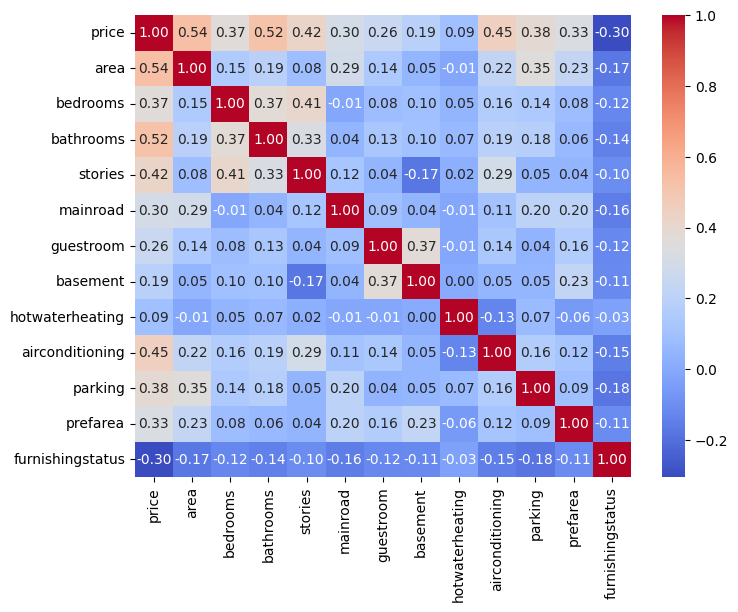

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

###FEATURE SELECTION

In [ ]:
x=data.drop("price",axis=1)
y=data["price"]


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(x,y)



In [ ]:
print(fit.scores_)

[218.88408118  84.25102178 198.65452062 116.78040217  52.49183918
  37.92827585  19.68856916   4.74486966 140.16272089  94.14332782
  66.25864622  55.58137479]


### MODEL SPLITING FOR TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

# **MODEL SELECTION AND TRAINING**

###LinearRegression

Linear Regression is a statistical model used to predict a continuous output based on one or more input variables by fitting a straight line to the data.
It shows how changes in independent variables affect the dependent variable.
This model is widely used in data science for forecasting, trend analysis, and predictive analytics.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
linear_ypred = linear_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, linear_ypred))

R² Score: 0.6494754192267803


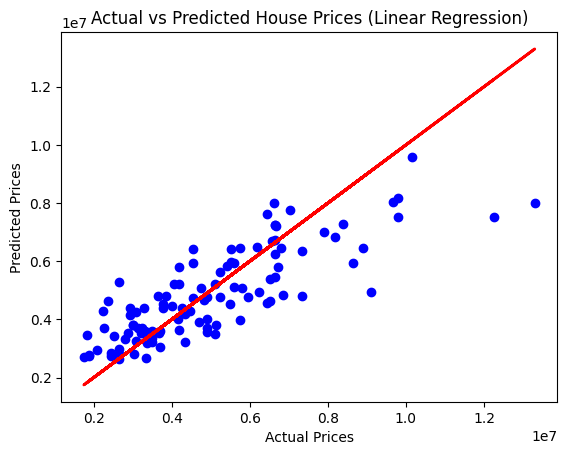

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, linear_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()

### DESCISION TREE

A Decision Tree is a model that makes decisions by asking a series of yes or no questions.

 It looks like a tree with branches leading to answers or results.

  It helps in predicting outcomes, like whether someone will buy a product or not.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [ ]:
DecisionTree_ypred = DecisionTree_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R2 score:",r2_score(ytest, DecisionTree_ypred))

R2 score: 0.4198120671176594


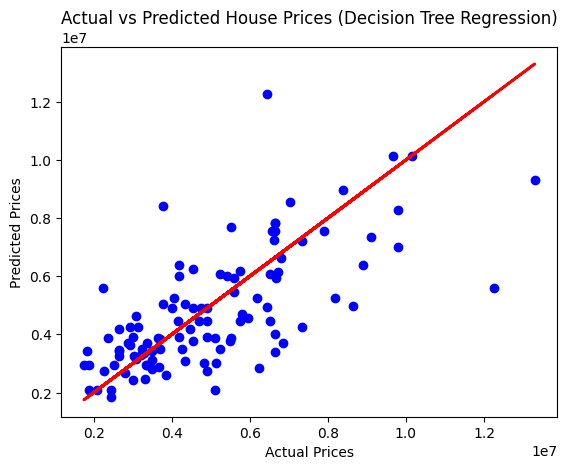

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, DecisionTree_ypred, color='blue')
plt.plot(ytest, ytest, color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Decision Tree Regression)")
plt.show()


### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForest_model=RandomForestRegressor(n_estimators=10,random_state=0,oob_score=True)
RandomForest_model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
RandomForest_ypred = RandomForest_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R2 score:",r2_score(ytest, RandomForest_ypred))

R2 score: 0.642967468999922


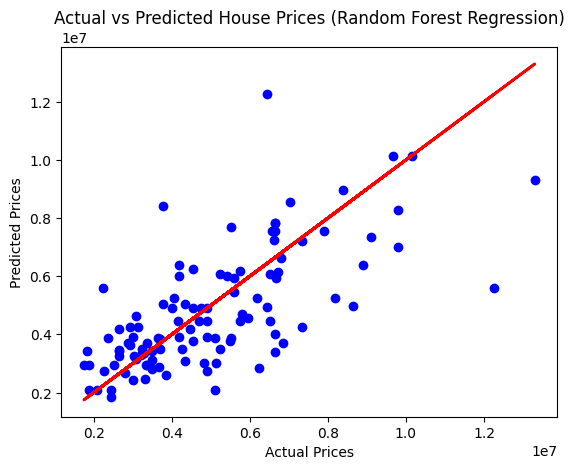

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, DecisionTree_ypred, color='blue')
plt.plot(ytest, ytest, color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Random Forest Regression)")
plt.show()

## SVR

SVR (Support Vector Regression) is a machine learning model that predicts continuous values by fitting data within a small margin of error.

it is an adaptation of popular Support Vector Machine (SVM) algorithm

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVR_model = SVR()
SVR_model.fit(xtrain,ytrain)

SVR()

In [ ]:
SVR_model_ypred = SVR_model.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(ytest, SVR_model_ypred))

R² Score: -0.10156389053848902


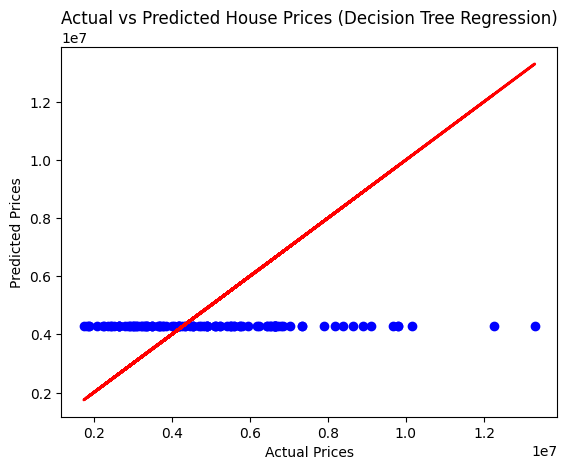

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest, SVR_model_ypred, color='blue')   # scatter plot
plt.plot(ytest, ytest, color='red', linewidth=2) # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Decision Tree Regression)")
plt.show()

# **CONCLUSION**

The House Price Prediction project successfully demonstrates how machine learning can be used to estimate property prices based on multiple features such as location, area, and amenities

Among the models implemented — Linear Regression, Decision Tree, Random Forest, and Support Vector Regression (SVR) — the Random Forest Regressor generally provides the highest accuracy and robustness, as it effectively captures complex, non-linear relationships in the data.

Linear Regression performs well for simpler, linearly correlated datasets and is easier to interpret, while Decision Tree offers intuitive visualization but may overfit the data. SVR is effective for smaller datasets with non-linear patterns but requires more parameter tuning

Overall, Linear Regression is ideal for simplicity, whereas Random Forest is preferred for accuracy.